In [35]:
# Import Library dan Mengambil Data
import pandas as pd
import numpy as np
import io
import pandas_profiling
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv")
data

order_id  order_date  customer_id             city     province  \
0      1703458  17/10/2019        14004  Jakarta Selatan  DKI Jakarta   
1      1706815  24/10/2019        17220  Jakarta Selatan  DKI Jakarta   
2      1710718  03/11/2019        16518    Jakarta Utara  DKI Jakarta   
3      1683592  19/08/2019        16364    Jakarta Barat  DKI Jakarta   
4      1702573  16/10/2019        15696    Jakarta Timur  DKI Jakarta   
...        ...         ...          ...              ...          ...   
4995   1724011  01/12/2019        12838        Tangerang       Banten   
4996   1676302  28/07/2019        13833            Bogor   Jawa Barat   
4997   1706071  23/10/2019        16332    Jakarta Timur  DKI Jakarta   
4998   1703620  17/10/2019        13055    Jakarta Barat  DKI Jakarta   
4999   1720036  24/11/2019        17609    Jakarta Pusat  DKI Jakarta   

     product_id    brand  quantity  item_price  
0         P1910  BRAND_J      10.0    740000.0  
1         P2934  BRAND_R       2.0    604000.0  
2         P0908  BRAND_C       8.0   1045000.0  
3         P0128  BRAND_A       4.0    205000.0  
4         P2968  BRAND_R       2.0         NaN  
...         ...      ...       ...         ...  
4995      P3047  BRAND_R       2.0    450000.0  
4996      P0760  BRAND_C       3.0   1465000.0  
4997      P1681  BRAND_H       4.0    747000.0  
4998      P0757  BRAND_C       8.0    695000.0  
4999      P3334  BRAND_S       1.0   1045000.0  

[5000 rows x 9 columns]

In [36]:
# Cek tipe data untuk setiap kolom
data.dtypes

order_id         int64
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object

In [37]:
# Descriptive Statistics : Length
len(data["product_id"])

5000

In [38]:
# Descriptive Statistics : count()
print(data["product_id"].count())

4989


In [39]:
# Descriptive Statistics : Missing Values (Manual)
length = len(data["product_id"])
counts = data["product_id"].count()
persentase_missing_values = (length - counts)/ length * 100
print("Persentase missing values dalam kolom product_id = {0:.1f}%".format(persentase_missing_values))

Persentase missing values dalam kolom product_id = 0.2%


In [40]:
# Descriptive Statistics : min, max, ukuran pemusatan data, dan ukuran penyebaran data (manual)
print("Statistika Deskriptif untuk kolom item_price :")
item = data["item_price"]
print("Min :",item.min())
print("Max :",item.max())
print("Mean :",item.mean())
print("Median :",item.median())
print("Modus :",item.mode())
print("Standar Deviasi :",item.std())
print("Varians :",item.var())

Statistika Deskriptif untuk kolom item_price :
Min : 26000.0
Max : 29762000.0
Mean : 933742.7311008623
Median : 604000.0
Modus : 0    590000.0
Name: item_price, dtype: float64
Standar Deviasi : 1030829.8104242863
Varians : 1062610098059.37


In [41]:
# Descriptive Statistics : Quantile
print("Quartil ke-3 dari kolom quantity :",data["quantity"].quantile(0.75))
print("Persentil ke 25, 50, dan 80 dari kolom quantity :")
print(data["quantity"].quantile([0.25,0.50,0.80]))

Quartil ke-3 dari kolom quantity : 12.0
Persentil ke 25, 50, dan 80 dari kolom quantity :
0.25     2.0
0.50     5.0
0.80    12.0
Name: quantity, dtype: float64


In [42]:
# Descriptive Statistics : Korelasi
print("Korelasi antara kolom quantity dan item_price :")
print(data[['quantity','item_price']].corr())

Korelasi antara kolom quantity dan item_price :
            quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


In [43]:
# Penggunaan Pandas Profiling
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning : Missing Values

In [44]:
# Cek Missing Values dalam data dan handling missing values dengan pendekatan mean imputation
print(data.isna().any())
data.fillna(data.mean(),inplace=True)

order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool


C:\Users\zulfi\AppData\Local\Temp\ipykernel_3308\3452996276.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(),inplace=True)


# Data Cleaning  : Outliers

In [45]:
# Melihat apakah ada nilai outlier dalam kolom item_price
Q1 = data.quantity.quantile(0.25)
Q3 = data.quantity.quantile(0.75)
IQR = Q3 - Q1
data.loc[(data["quantity"] < Q1 - 1.5*IQR) | (data["quantity"] > Q3 + 1.5*IQR)]

order_id  order_date  customer_id             city     province  \
8      1741846  30/12/2019        16873    Jakarta Barat  DKI Jakarta   
26     1702162  15/10/2019        17450            Bogor   Jawa Barat   
30     1675705  25/07/2019        16316    Jakarta Timur  DKI Jakarta   
31     1710385  01/11/2019        13689           Malang   Jawa Timur   
33     1689703  09/09/2019        13621  Jakarta Selatan  DKI Jakarta   
...        ...         ...          ...              ...          ...   
4932   1677337  31/07/2019        17315  Jakarta Selatan  DKI Jakarta   
4937   1668907  05/07/2019        15267       Purwokerto  Jawa Tengah   
4948   1681786  13/08/2019        16656       Purwokerto  Jawa Tengah   
4975   1699216  07/10/2019        17919       Yogyakarta   Yogyakarta   
4979   1734193  17/12/2019        13238            Depok   Jawa Barat   

     product_id    brand  quantity     item_price  
8         P3203  BRAND_S      32.0  450000.000000  
26        P3958  BRAND_W      96.0  933742.731101  
30        P2560  BRAND_P      36.0   79000.000000  
31        P1900  BRAND_J     100.0  639000.000000  
33        P2789  BRAND_P     100.0   26000.000000  
...         ...      ...       ...            ...  
4932      P3322  BRAND_S      60.0  590000.000000  
4937      P2950  BRAND_R     144.0  376000.000000  
4948      P0296  BRAND_B      72.0  264000.000000  
4975      P2411  BRAND_P      72.0  149000.000000  
4979      P1891  BRAND_J      50.0  740000.000000  

[301 rows x 9 columns]

In [46]:
# Menghapus data outliers dari data kita
data = data.loc[~((data["quantity"] < Q1 - 1.5*IQR) | (data["quantity"] > Q3 + 1.5*IQR))]
data.shape

(4699, 9)

# Data Cleaning : Duplicated Data

In [48]:
# Melihat apakah ada data yang terduplikasi pada data kita
data.duplicated(subset=None).sum()

7

In [53]:
# Membuang data yang terduplikasi
data.drop_duplicates(inplace=True)
data.duplicated(subset=None).sum()

C:\Users\zulfi\AppData\Local\Temp\ipykernel_3308\2064338375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


0

# Mini Project

In [79]:
# Import data dan lakukan data profiling
import pandas as pd
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv")

# Inspeksi data
print(data.head())
print("Bentuk Data :",data.shape)

# Identifikasi Missing Values
print("Laporan Missing Values :")
print(data.isna().any())
count_quantity = data['Quantity'].count()
length_quantity = len(data['Quantity'])
persentase = (length_quantity - count_quantity) / length_quantity * 100
print("Kolom Quantity memiliki missing values sebesar {0:.1f}%".format(persentase))

# Mengimpute Missing Values dengan nilai Mean
data["Quantity"] = data['Quantity'].fillna(data["Quantity"].mean())
print("Laporan Missing Values yang Baru:")
print(data.isna().any())

   InvoiceNo                          Description  Quantity     InvoiceDate  \
0     536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1     536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2     536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4     536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   

   UnitPrice  CustomerID      City  
0      29000       17850  Surabaya  
1      41000       17850  Surabaya  
2      18000       17850  Surabaya  
3      38000       17850   Jakarta  
4      27000       17850     Medan  
Bentuk Data : (505, 7)
Laporan Missing Values :
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool
Kolom Quantity memiliki missing values sebesar 4.0%
Laporan Missing Values yang Baru:
InvoiceNo 

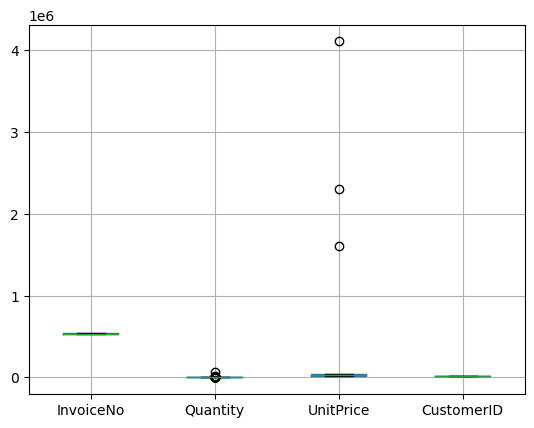

In [80]:
# Identifikasi Outliers pada Data Menggunakan Boxplot
import matplotlib.pyplot as plt
data.boxplot()
plt.show()

Jumlah data yang terduplikasi : 6
Jumlah data akhir yang terduplikasi : 0


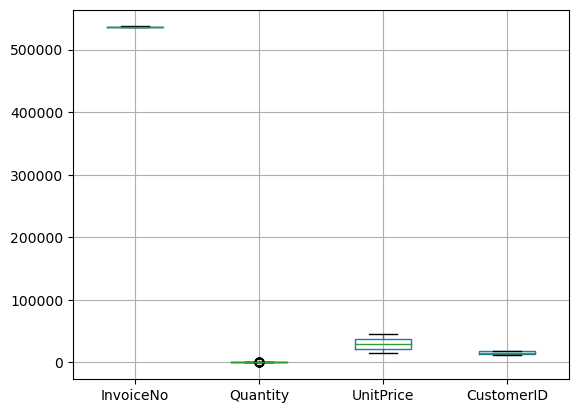

In [81]:
# Menghapus Outliers dan Identifikasi serta Menghapus Duplicated Data
for column in ['UnitPrice','Quantity'] :
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    data = data.loc[~((data[column] < Q1 - 1.5*IQR)|(data[column] > Q3 + 1.5*IQR))]
# Identifikasi dan Menghapus Duplicated Data
print("Jumlah data yang terduplikasi :",data.duplicated(subset=None).sum())
data.drop_duplicates(inplace=True)

# Laporan Akhir
print("Jumlah data akhir yang terduplikasi :",data.duplicated(subset=None).sum())
data.boxplot()
plt.show()

In [82]:
# Bonus : Pandas Profiling Report
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Sumber Belajar :
- www.dqlab.id
- www.chat.openai.com